In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
import pickle
warnings.filterwarnings('ignore')

ABOUT THE DATASET The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. As there are two different file of data set(train and test) then will be doing following steps on train file:- EDA(Summary Statistics and Visualizations),Data Cleaning, Feature Enginnering(using label encoder),splitting the data(train test split), Model selection and training, Model Evaluation,Model validation, Hyperparameter tuning and Deloyment.
Where as in case of test dataset will only be performing EDA(Summary Statistics and Visualizations),Data Cleaning, Feature Enginnering(using label encoder).

In [2]:
train_df = pd.read_csv('Bank_train.csv')
train_df

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

The train dataframe has 31647 rows and 18 columns.
ABOUT THE VARIABLES

The datset is divided into two major variable input n output variables.The attribute of input and output variables are as follow"- 
1 - ID 2 - age 3 -job 4 - marital 5 - education 6 - default 7 - balance 8 - housing 9 - loan 10 - contact 11 - day 12 - month 13-duration 14-campaign 15-pdays 16-previous 17-poutcome 18-subscribed

We can see that there are 13564rows and 18 columns including output variable.

Checking the dataset by applying various functions as mentioned below:- i head() ii tail iii shape( which shows the no. of rows n columns) iv data types(here we can see whether my data is numerical or categorical)


In [3]:
test_df = pd.read_csv('bank_test.csv')
test_df

ID  age            job   marital  education default  balance  \
0      38441   32       services   married  secondary      no      118   
1      40403   78        retired  divorced    primary      no     2787   
2       3709   31  self-employed    single   tertiary      no      144   
3      37422   57       services    single    primary      no     3777   
4      12527   45    blue-collar  divorced  secondary      no     -705   
...      ...  ...            ...       ...        ...     ...      ...   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.    single  secondary      no      464   
13563  34839   29         admin.   married  secondary      no        2   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no   cellular   15   may        20         6     -1         0   
1          no   no  telephone    1   jul       372         1     -1         0   
2         yes   no    unknown   16   may       676         1     -1         0   
3         yes   no  telephone   13   may        65         2     -1         0   
4          no  yes    unknown    3   jul       111         1     -1         0   
...       ...  ...        ...  ...   ...       ...       ...    ...       ...   
13559      no   no   cellular   28   aug       148         4     -1         0   
13560     yes   no    unknown   20   jun       158         1     -1         0   
13561     yes   no   cellular   29   jan       136         1     -1         0   
13562      no   no   cellular    9   nov       208         2     91         3   
13563     yes   no   cellular    6   may       339         1    362         1   

      poutcome  
0      unknown  
1      unknown  
2      unknown  
3      unknown  
4      unknown  
...        ...  
13559  unknown  
13560  unknown  
13561  unknown  
13562  success  
13563  failure  

[13564 rows x 17 columns]

The test dataframe has 13564 rows and 17 columns.
ABOUT THE VARIABLES

The datset is divided into two major variable input n output variables.The attribute of input and output variables are as follow"- 
1 - ID 2 - age 3 -job 4 - marital 5 - education 6 - default 7 - balance 8 - housing 9 - loan 10 - contact 11 - day 12 - month 13-duration 14-campaign 15-pdays 16-previous 17-poutcome 

We can see that there are 13564rows and 17 columns including output variable.

Checking the dataset by applying various functions as mentioned below:- i head() ii tail iii shape( which shows the no. of rows n columns) iv data types(here we can see whether my data is numerical or categorical)



There are two type of file as follow:
    1.train.csv : Use this dataset to train the model. This file contains all the client and call details as well         as the target variable “subscribed”. You have to train your model using this file.
    2.test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

In [4]:
train_df.columns                            #Checking the different columns present.

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [5]:
 df1=train_df.drop(['ID'], axis=1)                              #Removing the ID column from the train dataset

In [6]:
df1.head()

age         job   marital  education default  balance housing loan  \
0   56      admin.   married    unknown      no     1933      no   no   
1   31     unknown   married  secondary      no        3      no   no   
2   27    services   married  secondary      no      891     yes   no   
3   57  management  divorced   tertiary      no     3287      no   no   
4   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [7]:
df1.tail()

age         job   marital  education default  balance housing loan  \
31642   29  management    single   tertiary      no        0     yes   no   
31643   53  management  divorced   tertiary      no      380      no  yes   
31644   32  management    single   tertiary      no      312      no   no   
31645   57  technician   married  secondary      no      225     yes   no   
31646   55  management  divorced  secondary      no      204     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
31642   cellular   12   may       116         2     -1         0  unknown   
31643   cellular    5   jun       438         2     -1         0  unknown   
31644   cellular    7   aug        37         3     -1         0  unknown   
31645  telephone   15   may        22         7    337        12  failure   
31646   cellular   11   jul      1973         2     -1         0  unknown   

      subscribed  
31642         no  
31643        yes  
31644         no  
31645         no  
31646        yes

In [8]:
df1.shape

(31647, 17)

In [9]:
df1.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

It is observed that both numerical and categroical data is present in th dataset.

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


With the help of above function we can get the detailed information about the data like Range index,Colunm name, non-null count, data type and memory usage.

In [11]:
df1['job'].unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

In [12]:
df1['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [13]:
df1['education'].unique()

array(['unknown', 'secondary', 'tertiary', 'primary'], dtype=object)

In [14]:
df1['default'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
df1['housing'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
df1['loan'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
df1['contact'].unique()

array(['telephone', 'cellular', 'unknown'], dtype=object)

In [18]:
df1['month'].unique()

array(['nov', 'jul', 'jun', 'feb', 'sep', 'jan', 'may', 'aug', 'apr',
       'oct', 'mar', 'dec'], dtype=object)

In [19]:
df1['poutcome'].unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [20]:
df1['subscribed'].unique()

array(['no', 'yes'], dtype=object)

Checked the unique value in various column and also checked the number of unqiue values present in each column.

In [21]:
df1.isnull()

age    job  marital  education  default  balance  housing   loan  \
0      False  False    False      False    False    False    False  False   
1      False  False    False      False    False    False    False  False   
2      False  False    False      False    False    False    False  False   
3      False  False    False      False    False    False    False  False   
4      False  False    False      False    False    False    False  False   
...      ...    ...      ...        ...      ...      ...      ...    ...   
31642  False  False    False      False    False    False    False  False   
31643  False  False    False      False    False    False    False  False   
31644  False  False    False      False    False    False    False  False   
31645  False  False    False      False    False    False    False  False   
31646  False  False    False      False    False    False    False  False   

       contact    day  month  duration  campaign  pdays  previous  poutcome  \
0        False  False  False     False     False  False     False     False   
1        False  False  False     False     False  False     False     False   
2        False  False  False     False     False  False     False     False   
3        False  False  False     False     False  False     False     False   
4        False  False  False     False     False  False     False     False   
...        ...    ...    ...       ...       ...    ...       ...       ...   
31642    False  False  False     False     False  False     False     False   
31643    False  False  False     False     False  False     False     False   
31644    False  False  False     False     False  False     False     False   
31645    False  False  False     False     False  False     False     False   
31646    False  False  False     False     False  False     False     False   

       subscribed  
0           False  
1           False  
2           False  
3           False  
4           False  
...           ...  
31642       False  
31643       False  
31644       False  
31645       False  
31646       False  

[31647 rows x 17 columns]

In [22]:
df1.isnull().sum()              #Checking if any null value is present in the dataset.

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [23]:
label_encoders = {}
for column in df1.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        df1[column] = label_encoders[column].fit_transform(df1[column])


Using Label encoders to convert object data type to intereger for further process.

In [24]:
df1.dtypes

age           int64
job           int64
marital       int64
education     int64
default       int64
balance       int64
housing       int64
loan          int64
contact       int64
day           int64
month         int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int64
subscribed    int64
dtype: object

In [25]:
df1

age  job  marital  education  default  balance  housing  loan  contact  \
0       56    0        1          3        0     1933        0     0        1   
1       31   11        1          1        0        3        0     0        0   
2       27    7        1          1        0      891        1     0        0   
3       57    4        0          2        0     3287        0     0        0   
4       31    9        1          1        0      119        1     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
31642   29    4        2          2        0        0        1     0        0   
31643   53    4        0          2        0      380        0     1        0   
31644   32    4        2          2        0      312        0     0        0   
31645   57    9        1          1        0      225        1     0        1   
31646   55    4        0          1        0      204        1     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  subscribed  
0       19      9        44         2     -1         0         3           0  
1       20      5        91         2     -1         0         3           0  
2       18      5       240         1     -1         0         3           0  
3       22      6       867         1     84         3         2           1  
4        4      3       380         1     -1         0         3           0  
...    ...    ...       ...       ...    ...       ...       ...         ...  
31642   12      8       116         2     -1         0         3           0  
31643    5      6       438         2     -1         0         3           1  
31644    7      1        37         3     -1         0         3           0  
31645   15      8        22         7    337        12         0           0  
31646   11      5      1973         2     -1         0         3           1  

[31647 rows x 17 columns]

In [26]:
df1.describe()

age           job       marital     education       default  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean      40.957247      4.332923      1.167220      1.225013      0.018485   
std       10.625134      3.271868      0.607186      0.749195      0.134700   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       48.000000      7.000000      2.000000      2.000000      0.000000   
max       95.000000     11.000000      2.000000      3.000000      1.000000   

             balance       housing          loan       contact           day  \
count   31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean     1363.890258      0.555629      0.162132      0.644642     15.835466   
std      3028.304293      0.496904      0.368578      0.899480      8.337097   
min     -8019.000000      0.000000      0.000000      0.000000      1.000000   
25%        73.000000      0.000000      0.000000      0.000000      8.000000   
50%       450.000000      1.000000      0.000000      0.000000     16.000000   
75%      1431.000000      1.000000      0.000000      2.000000     21.000000   
max    102127.000000      1.000000      1.000000      2.000000     31.000000   

              month      duration      campaign         pdays      previous  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean       5.533131    258.113534      2.765697     39.576042      0.574272   
std        3.004247    257.118973      3.113830     99.317592      2.422529   
min        0.000000      0.000000      1.000000     -1.000000      0.000000   
25%        3.000000    104.000000      1.000000     -1.000000      0.000000   
50%        6.000000    180.000000      2.000000     -1.000000      0.000000   
75%        8.000000    318.500000      3.000000     -1.000000      0.000000   
max       11.000000   4918.000000     63.000000    871.000000    275.000000   

           poutcome    subscribed  
count  31647.000000  31647.000000  
mean       2.566152      0.117389  
std        0.982069      0.321888  
min        0.000000      0.000000  
25%        3.000000      0.000000  
50%        3.000000      0.000000  
75%        3.000000      0.000000  
max        3.000000      1.000000

After doing all the required changes in the dataset and as there no negative values present in the dataset it looks good to continue the data analysing. Following observations can be done on the bases of describe function. i Count of all the coulumns are equal. ii Right skewness of data is present because in few columns as mean is more than median. iv There are also chances of outlier in some columns becasuse there is major difference in the values of 75% and max in some columns like Age,Fare.

<Axes: >

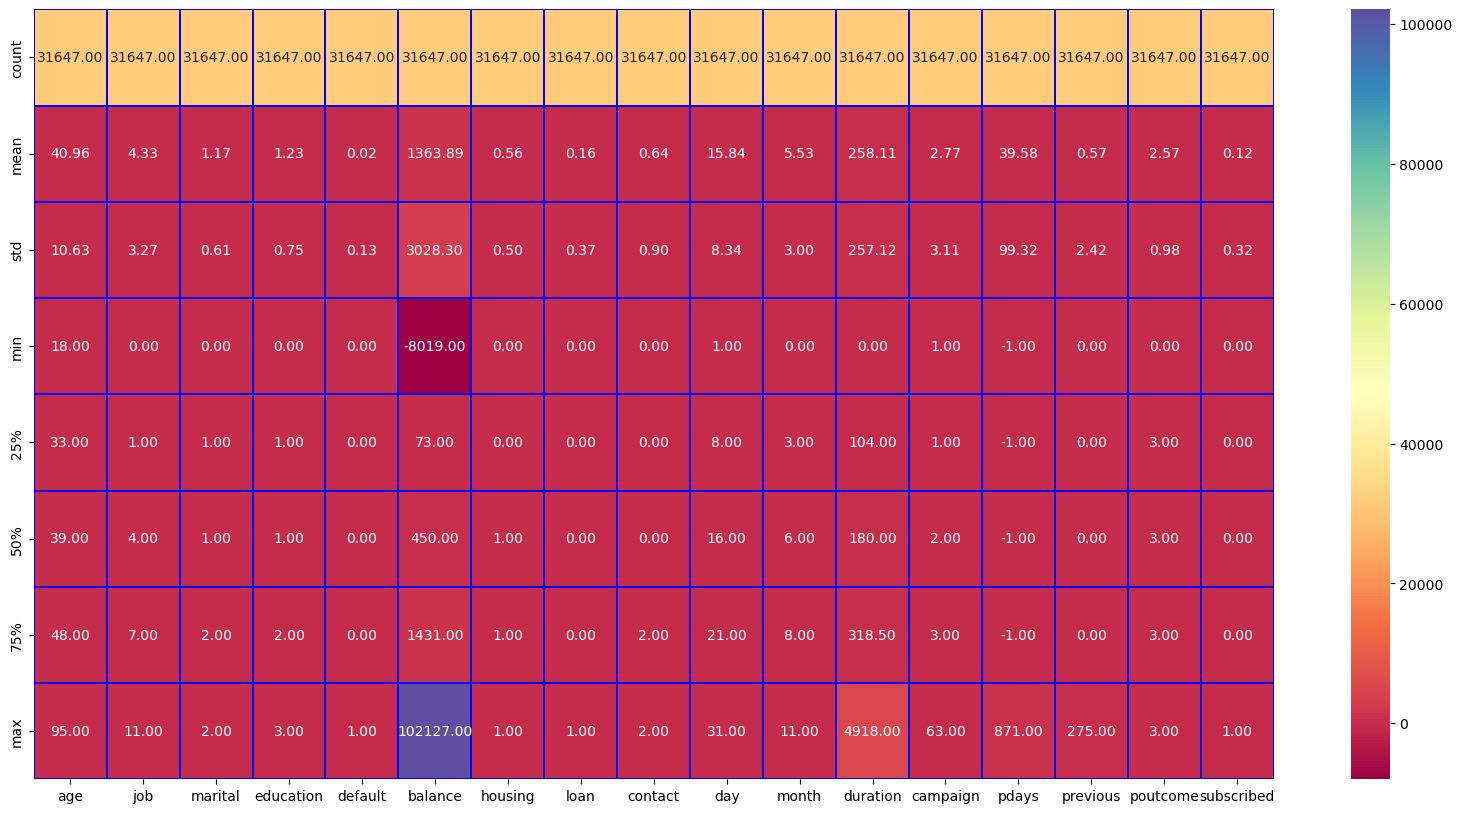

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.describe(),linewidth=0.3,annot=True,linecolor='blue',cmap='Spectral',fmt="0.2f")

In [28]:
df1

age  job  marital  education  default  balance  housing  loan  contact  \
0       56    0        1          3        0     1933        0     0        1   
1       31   11        1          1        0        3        0     0        0   
2       27    7        1          1        0      891        1     0        0   
3       57    4        0          2        0     3287        0     0        0   
4       31    9        1          1        0      119        1     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
31642   29    4        2          2        0        0        1     0        0   
31643   53    4        0          2        0      380        0     1        0   
31644   32    4        2          2        0      312        0     0        0   
31645   57    9        1          1        0      225        1     0        1   
31646   55    4        0          1        0      204        1     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  subscribed  
0       19      9        44         2     -1         0         3           0  
1       20      5        91         2     -1         0         3           0  
2       18      5       240         1     -1         0         3           0  
3       22      6       867         1     84         3         2           1  
4        4      3       380         1     -1         0         3           0  
...    ...    ...       ...       ...    ...       ...       ...         ...  
31642   12      8       116         2     -1         0         3           0  
31643    5      6       438         2     -1         0         3           1  
31644    7      1        37         3     -1         0         3           0  
31645   15      8        22         7    337        12         0           0  
31646   11      5      1973         2     -1         0         3           1  

[31647 rows x 17 columns]

DATA VISUALIZATION Various graphs are used to in order to understand how the data is distributed,it's skweness, scattered.

1    19095
2     8922
0     3630
Name: marital, dtype: int64


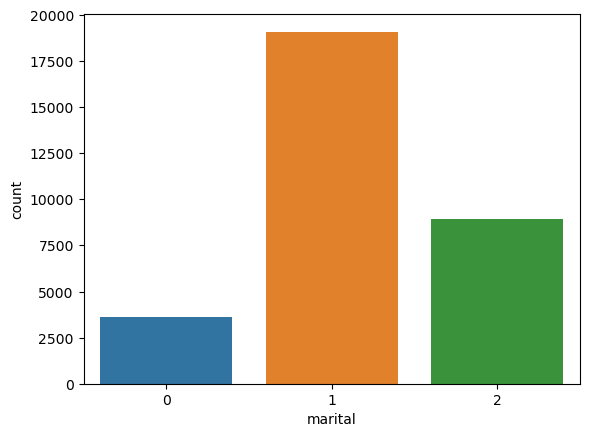

In [29]:
print(df1['marital'].value_counts())
ax=sns.countplot(x='marital',data=df1)

1     6842
4     6639
9     5307
0     3631
7     2903
5     1574
6     1123
2     1008
10     905
3      874
8      635
11     206
Name: job, dtype: int64


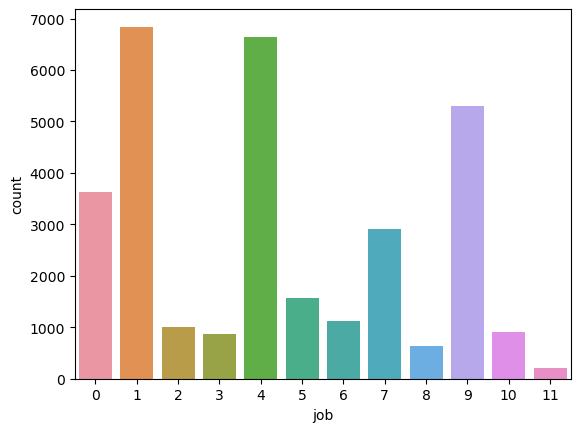

In [30]:
print(df1['job'].value_counts())
ax=sns.countplot(x='job',data=df1)

1    16224
2     9301
0     4808
3     1314
Name: education, dtype: int64


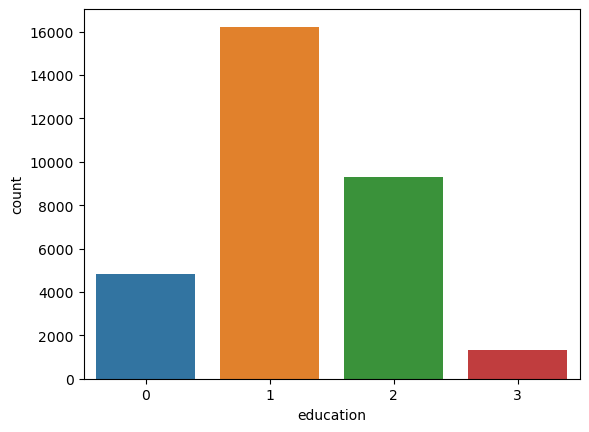

In [31]:
print(df1['education'].value_counts())
ax=sns.countplot(x='education',data=df1)

1    17584
0    14063
Name: housing, dtype: int64


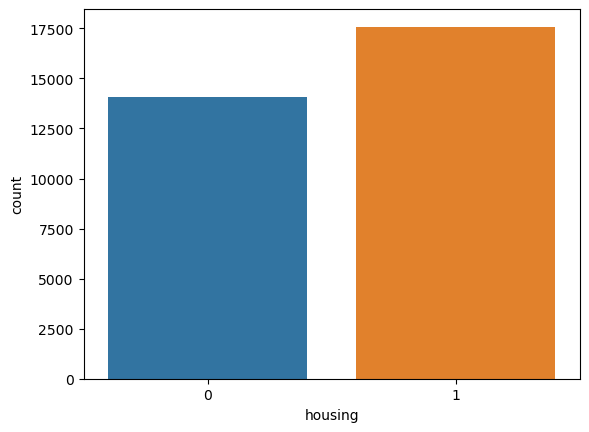

In [32]:
print(df1['housing'].value_counts())
ax=sns.countplot(x='housing',data=df1)

0    26516
1     5131
Name: loan, dtype: int64


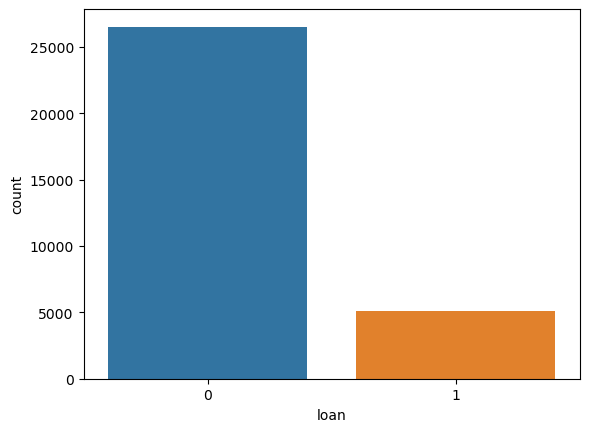

In [33]:
print(df1['loan'].value_counts())
ax=sns.countplot(x='loan',data=df1)

0    20423
2     9177
1     2047
Name: contact, dtype: int64


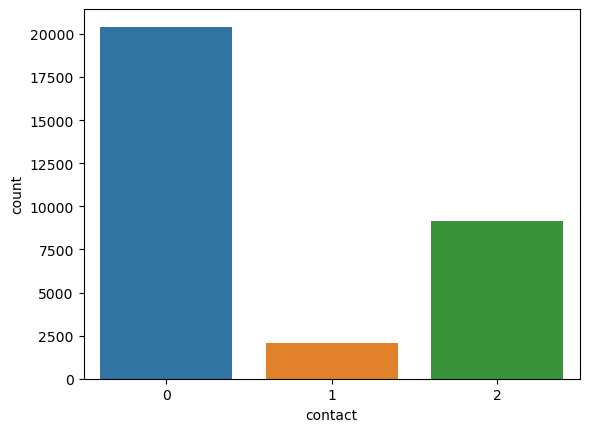

In [34]:
print(df1['contact'].value_counts())
ax=sns.countplot(x='contact',data=df1)

3    25929
0     3362
1     1288
2     1068
Name: poutcome, dtype: int64


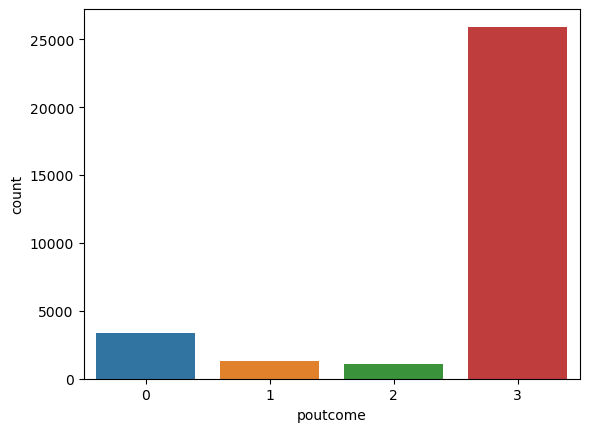

In [35]:
print(df1['poutcome'].value_counts())
ax=sns.countplot(x='poutcome',data=df1)

0    27932
1     3715
Name: subscribed, dtype: int64


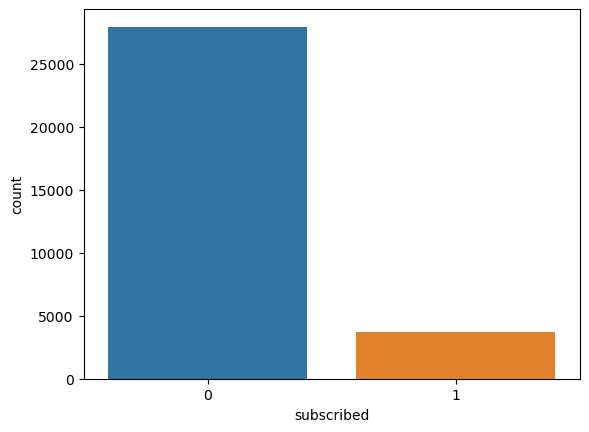

In [36]:
print(df1['subscribed'].value_counts())
ax=sns.countplot(x='subscribed',data=df1)

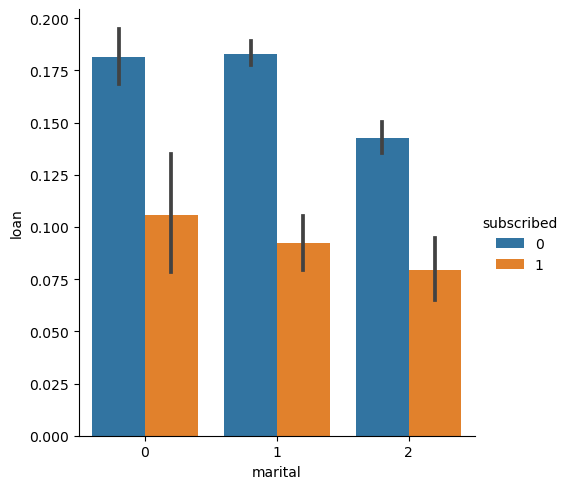

In [37]:
sns.catplot(x="marital",y="loan",hue="subscribed",data=df1,kind="bar")
plt.show()

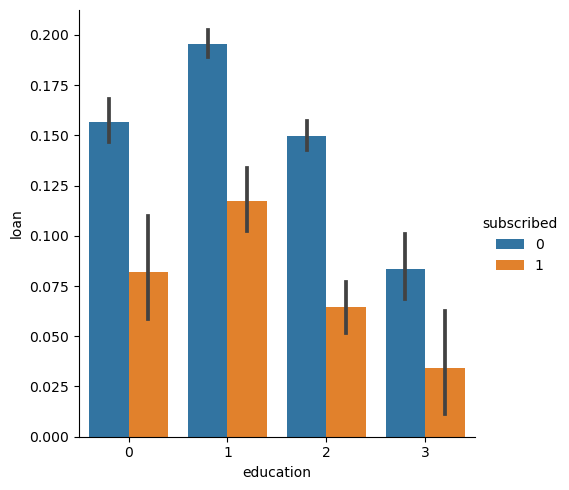

In [38]:
sns.catplot(x="education",y="loan",hue="subscribed",data=df1,kind="bar")
plt.show()

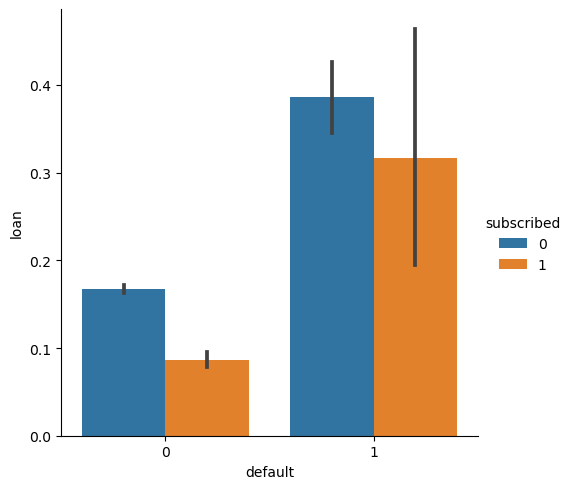

In [39]:
sns.catplot(x="default",y="loan",hue="subscribed",data=df1,kind="bar")
plt.show()

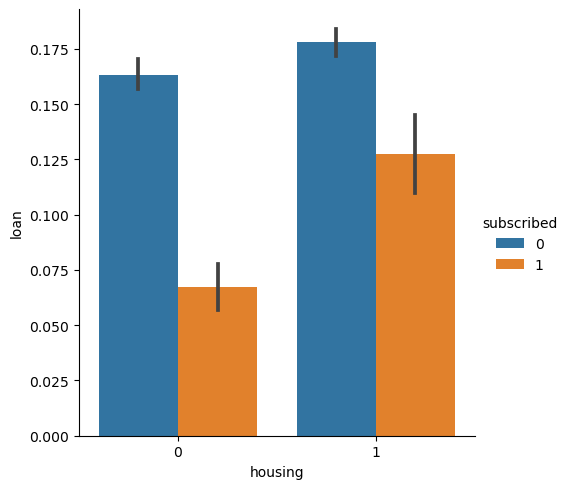

In [40]:
sns.catplot(x="housing",y="loan",hue="subscribed",data=df1,kind="bar")
plt.show()

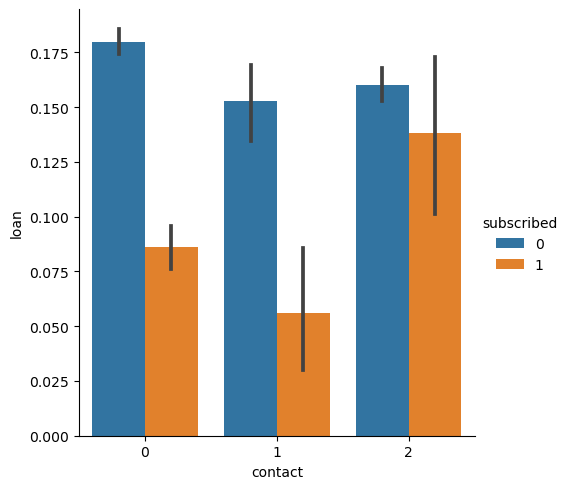

In [41]:
sns.catplot(x="contact",y="loan",hue="subscribed",data=df1,kind="bar")
plt.show()

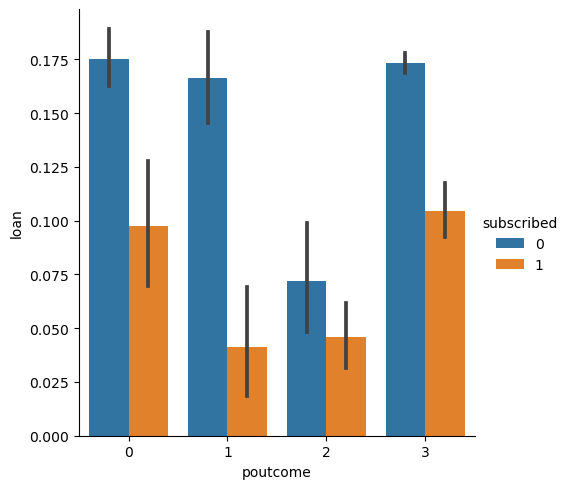

In [42]:
sns.catplot(x="poutcome",y="loan",hue="subscribed",data=df1,kind="bar")
plt.show()

<Axes: xlabel='job', ylabel='Density'>

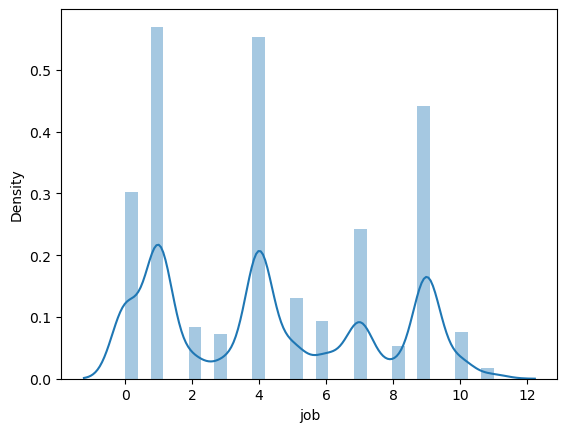

In [43]:
sns.distplot(df1['job'])

<Axes: xlabel='age', ylabel='Density'>

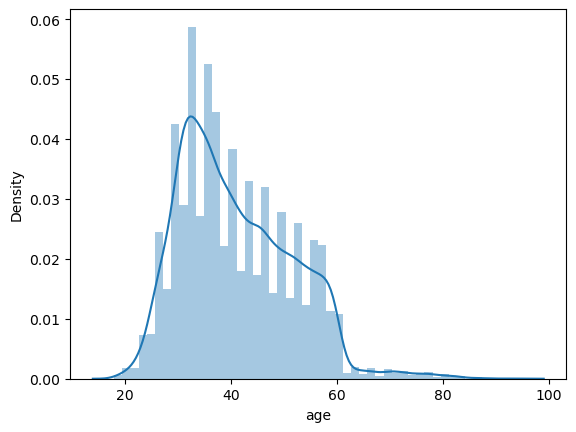

In [44]:
sns.distplot(df1['age'])

<Axes: xlabel='loan', ylabel='Density'>

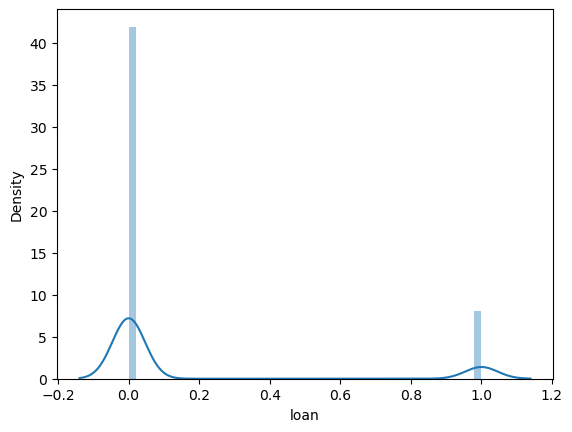

In [45]:
sns.distplot(df1['loan'])

<Axes: xlabel='marital', ylabel='Density'>

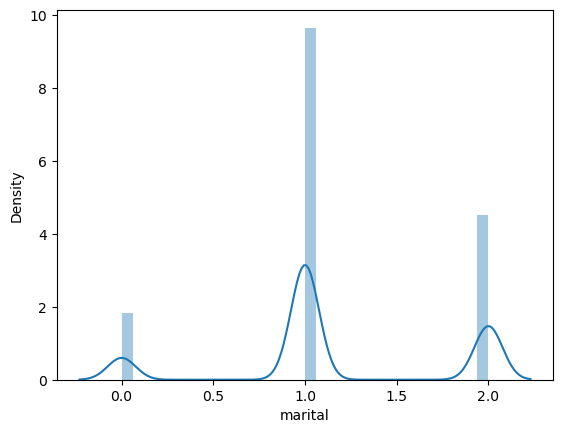

In [46]:
sns.distplot(df1['marital'])

Text(0.5, 1.0, 'Housing Vs Loan')

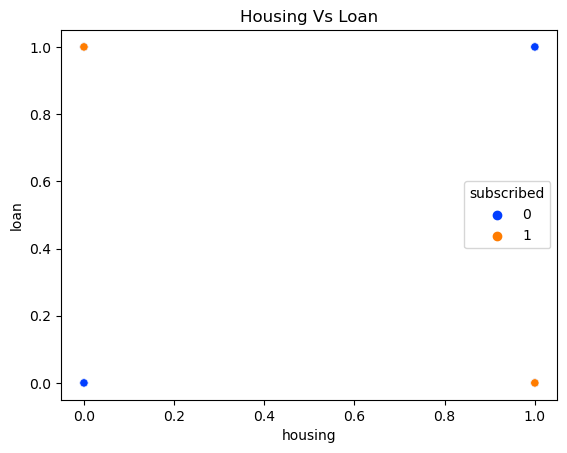

In [47]:
sns.scatterplot(x='housing',y='loan',hue='subscribed',data=df1,palette='bright')
plt.title('Housing Vs Loan')

Text(0.5, 1.0, 'contact Vs Subscribed')

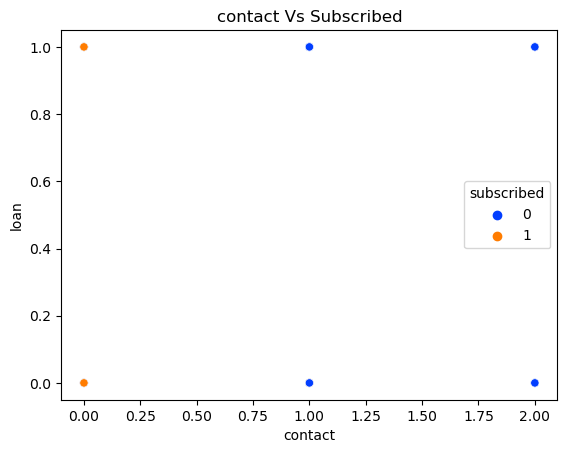

In [48]:
sns.scatterplot(x='contact',y='loan',hue='subscribed',data=df1,palette='bright')
plt.title('contact Vs Subscribed')

Text(0.5, 1.0, 'default Vs Loan')

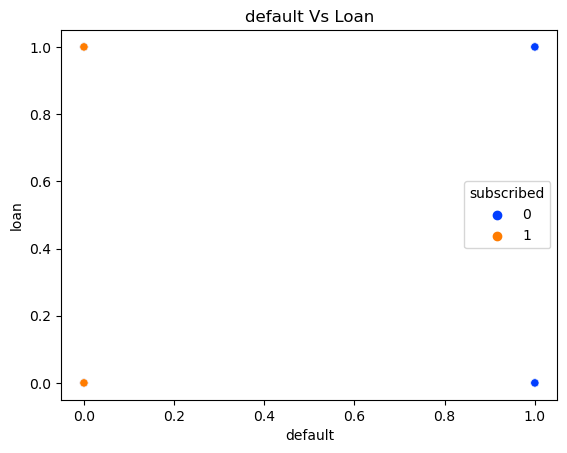

In [49]:
sns.scatterplot(x='default',y='loan',hue='subscribed',data=df1,palette='bright')
plt.title('default Vs Loan')

Text(0.5, 1.0, 'education Vs Subscribed')

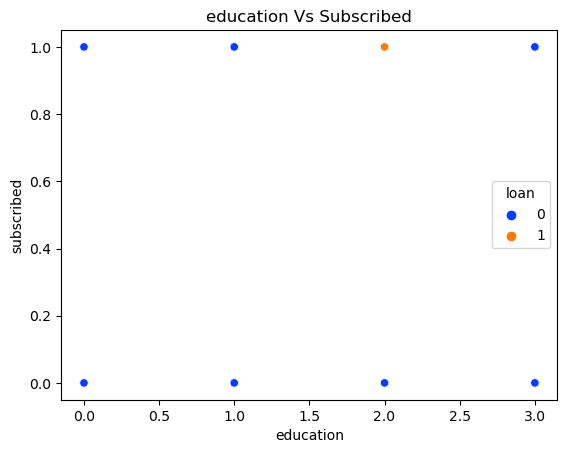

In [50]:
sns.scatterplot(x='education',y='subscribed',hue='loan',data=df1,palette='bright')
plt.title('education Vs Subscribed')

Using regression plots to creates the relationship between two numerical variables using scatter points and a fitted regression line.If the points are widely scattered, it suggests a weaker relationship between the variables.

<Axes: xlabel='loan', ylabel='subscribed'>

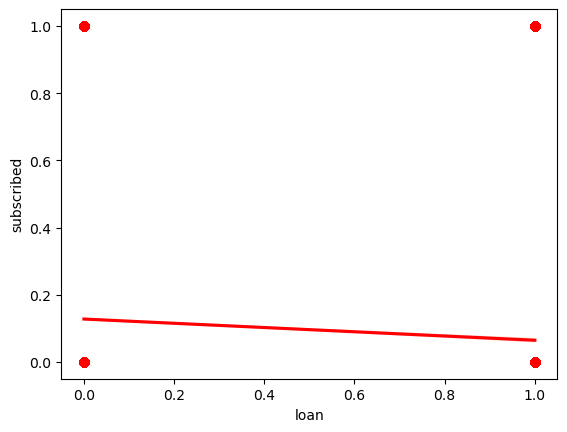

In [51]:
sns.regplot(data=df1, x="loan", y="subscribed", color='r')

<Axes: xlabel='education', ylabel='subscribed'>

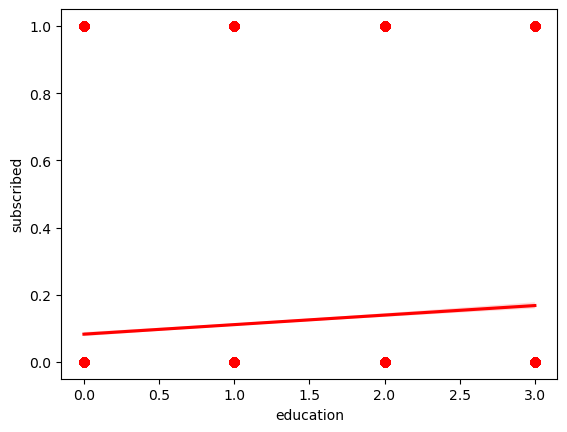

In [52]:
sns.regplot(data=df1, x="education", y="subscribed", color='r')

<Axes: xlabel='default', ylabel='subscribed'>

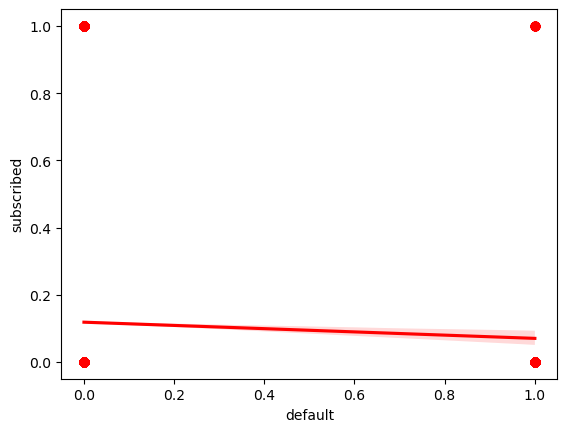

In [53]:
sns.regplot(data=df1, x="default", y="subscribed", color='r')

<Axes: xlabel='housing', ylabel='subscribed'>

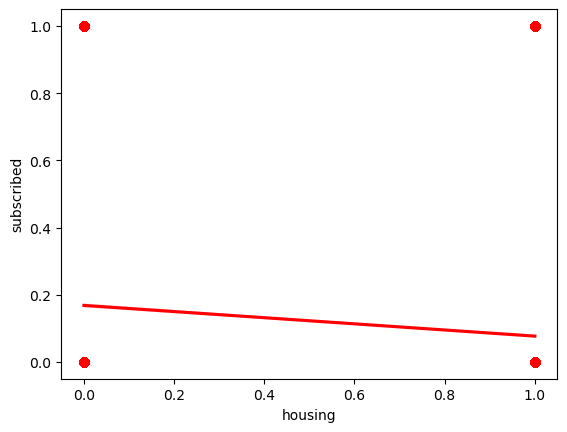

In [54]:
sns.regplot(data=df1, x="housing", y="subscribed", color='r')

<Axes: xlabel='contact', ylabel='subscribed'>

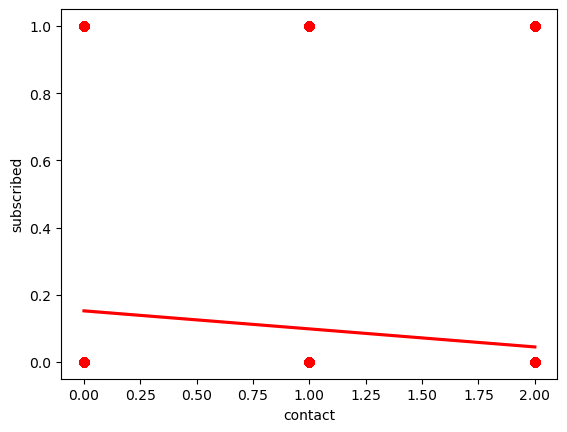

In [55]:
sns.regplot(data=df1, x="contact", y="subscribed", color='r')

<Axes: xlabel='poutcome', ylabel='subscribed'>

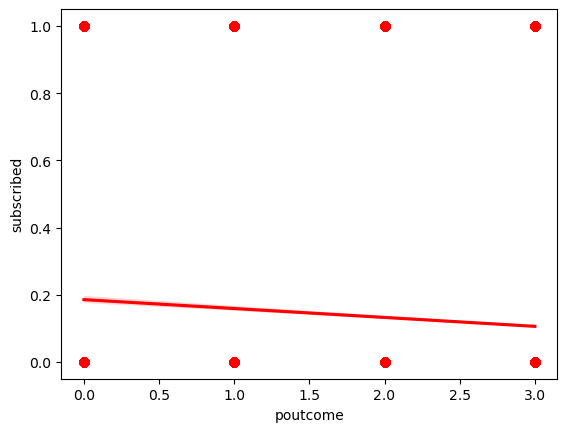

In [56]:
sns.regplot(data=df1, x="poutcome", y="subscribed", color='r')

<Axes: xlabel='loan', ylabel='subscribed'>

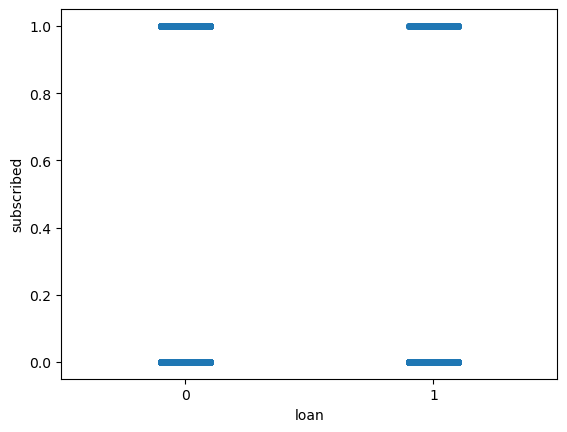

In [57]:
sns.stripplot(data=df1, x="loan", y="subscribed")

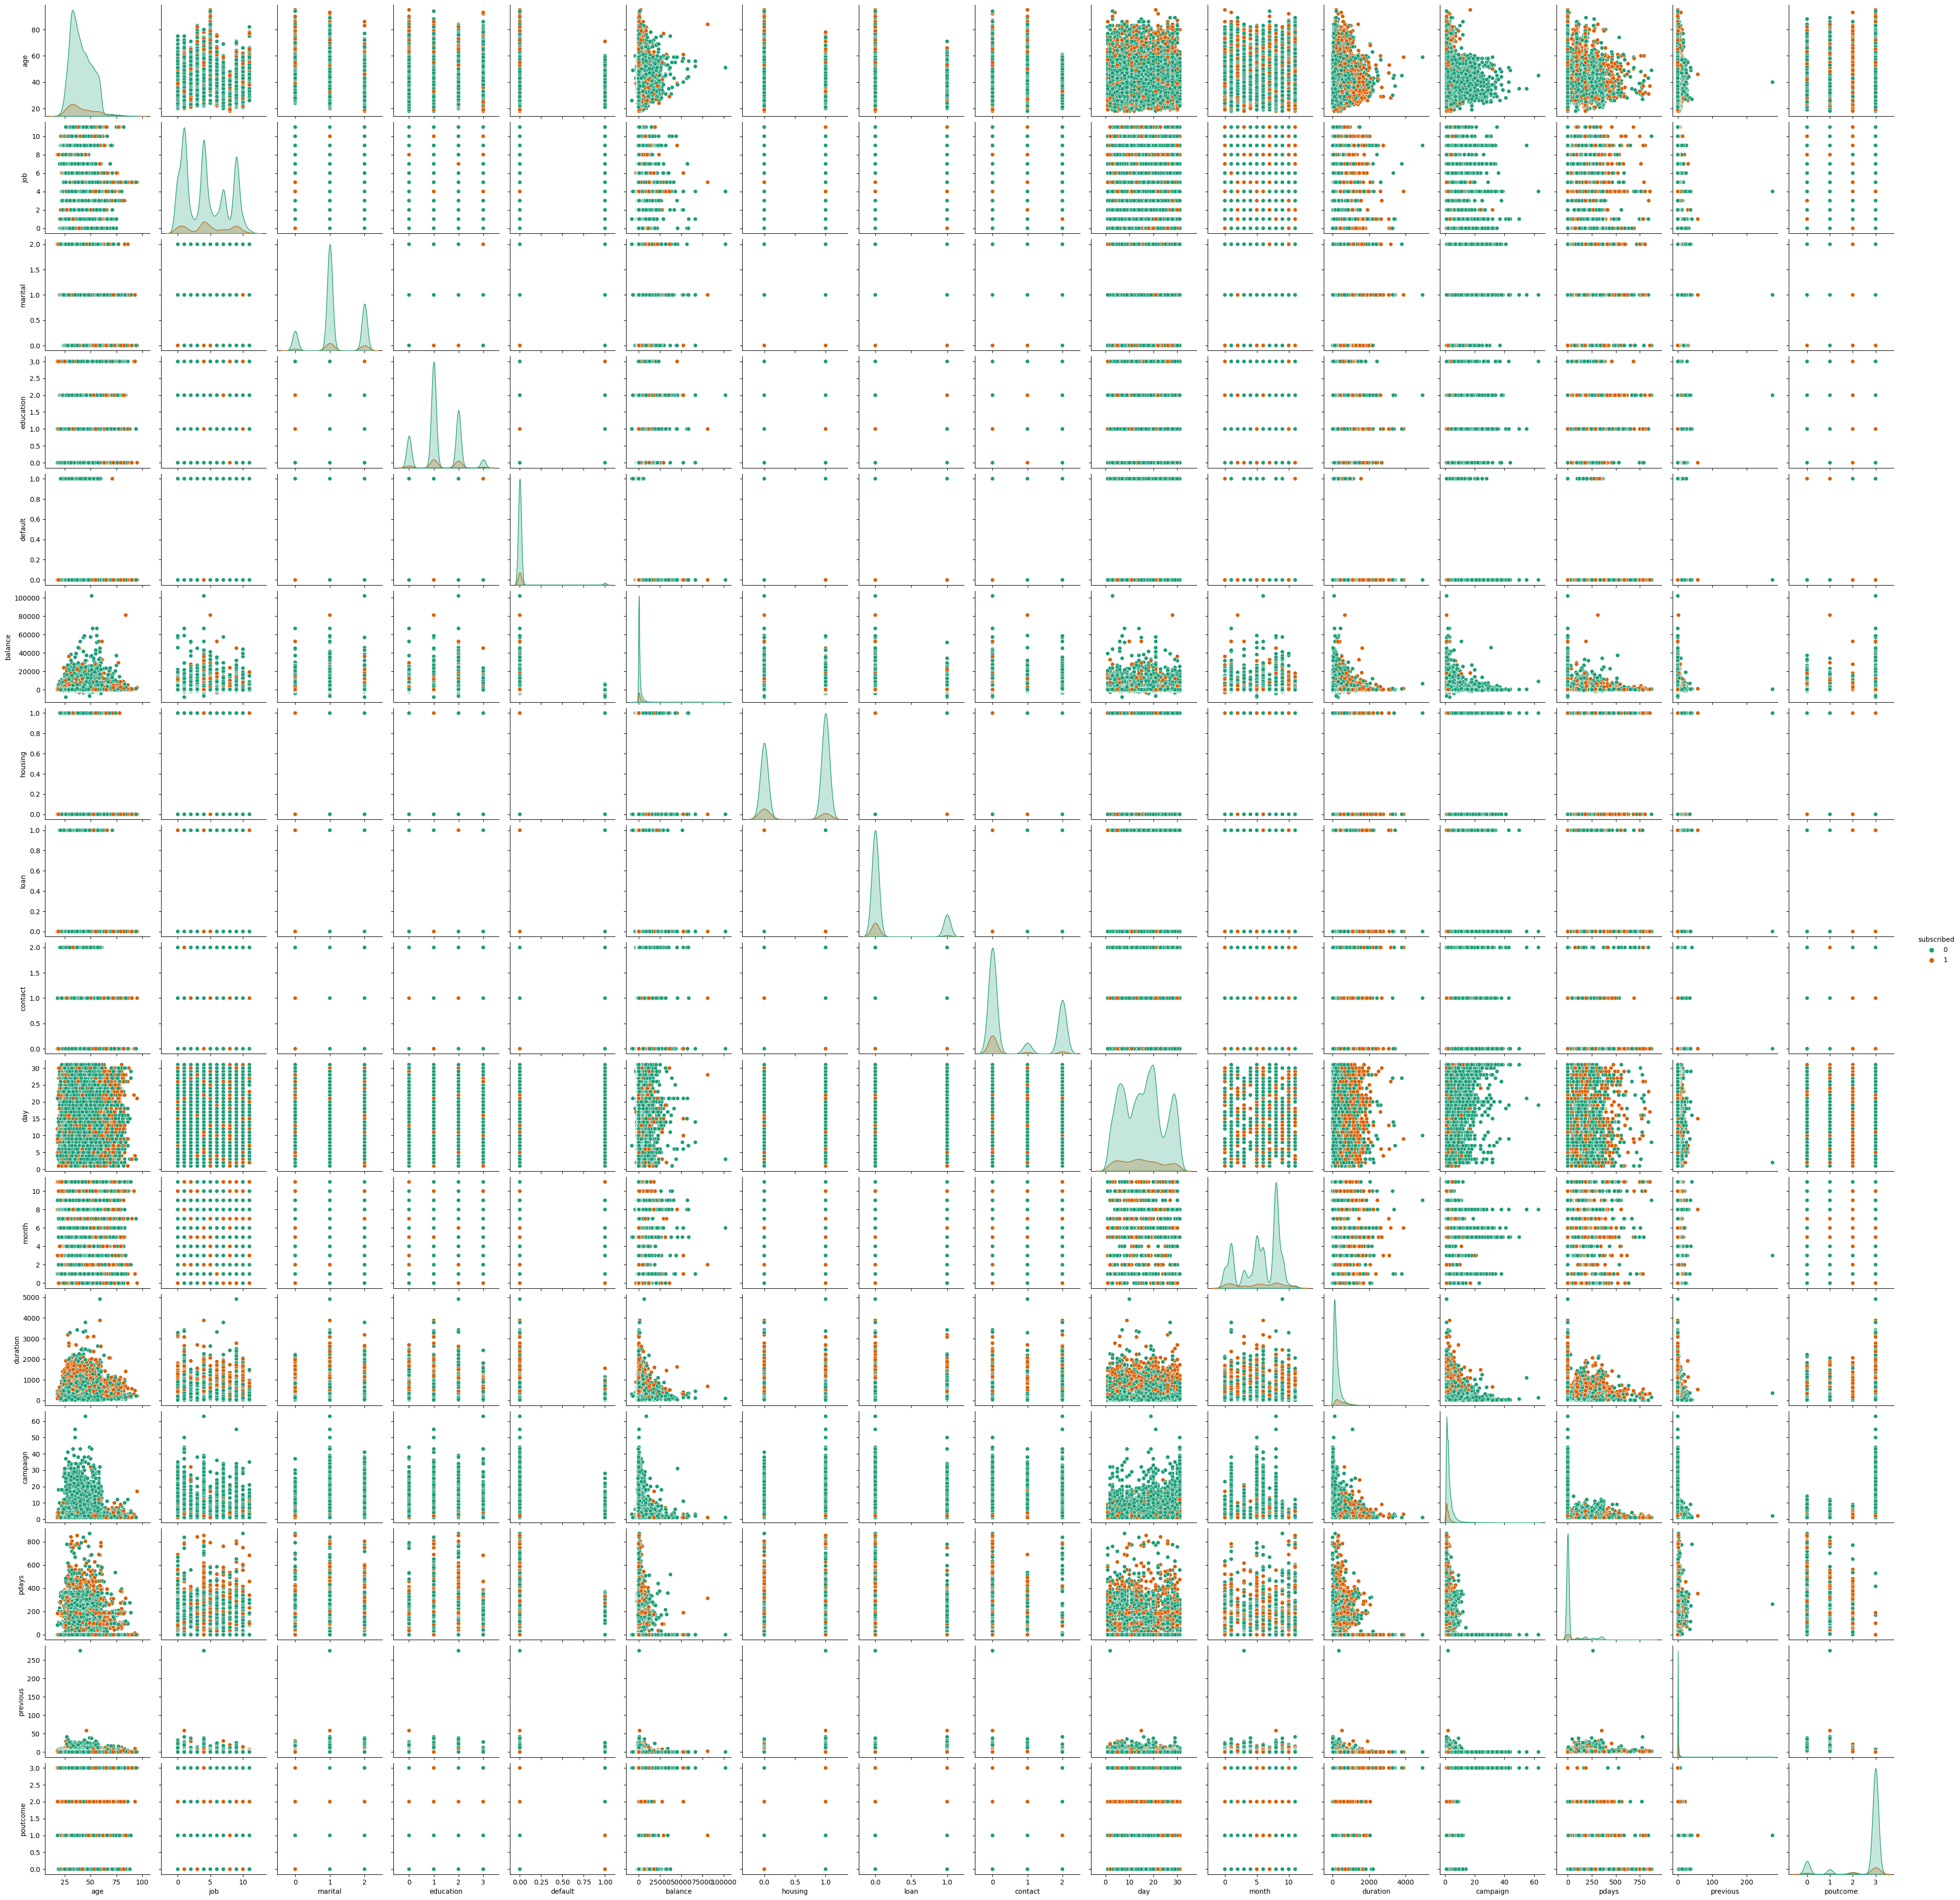

In [58]:
sns.pairplot(df1, hue ='subscribed',palette = 'Dark2')
plt.show()

From the above plots it is observeed that outliers are present in few columns of the dataset.Inorder to remove thoes outliers zscore is imported and as the threshold value for zscore is between -3 to +3 keeping that in mind removing the outliers.

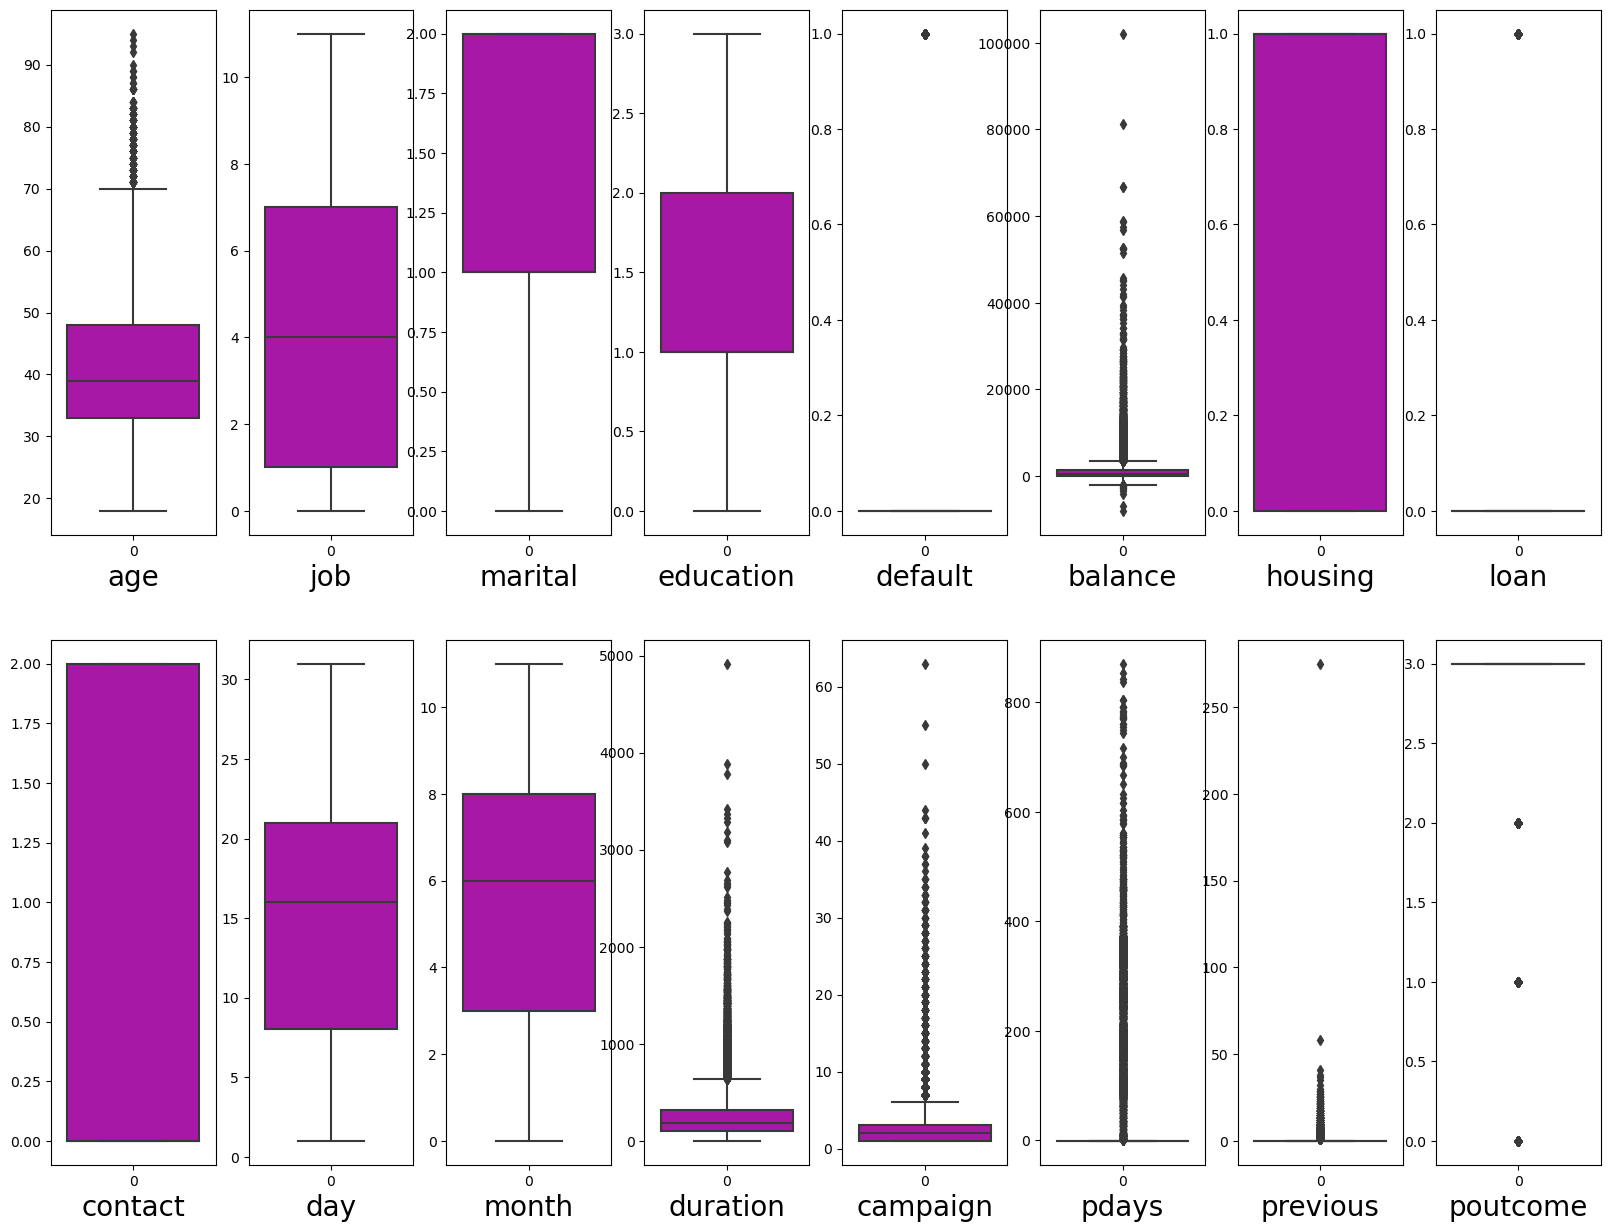

In [59]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for col in df1:
    if plotnumber <=16:
        ax=plt.subplot(2,8,plotnumber)
        sns.boxplot(df1[col],color = 'm')
        plt.xlabel(col, fontsize=20)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.show()

In [60]:
from scipy.stats import zscore
out_liers=df1[['age','balance','loan','default','duration','campaign','pdays','previous','poutcome']]
z=np.abs(zscore(out_liers))
z

age   balance      loan   default  duration  campaign     pdays  \
0      1.415793  0.187933  0.439893  0.137234  0.832754  0.245906  0.408555   
1      0.937156  0.449397  0.439893  0.137234  0.649957  0.245906  0.408555   
2      1.313627  0.156159  0.439893  0.137234  0.070449  0.567059  0.408555   
3      1.509911  0.635055  0.439893  0.137234  2.368149  0.567059  0.447299   
4      0.937156  0.411091  0.439893  0.137234  0.474054  0.567059  0.408555   
...         ...       ...       ...       ...       ...       ...       ...   
31642  1.125392  0.450388  0.439893  0.137234  0.552724  0.245906  0.408555   
31643  1.133439  0.324903  2.273280  0.137234  0.699635  0.245906  0.408555   
31644  0.843038  0.347358  0.439893  0.137234  0.859979  0.075247  0.408555   
31645  1.509911  0.376088  0.439893  0.137234  0.918319  1.359859  2.994723   
31646  1.321675  0.383022  0.439893  0.137234  6.669728  0.245906  0.408555   

       previous  poutcome  
0      0.237059  0.441777  
1      0.237059  0.441777  
2      0.237059  0.441777  
3      1.001336  0.576498  
4      0.237059  0.441777  
...         ...       ...  
31642  0.237059  0.441777  
31643  0.237059  0.441777  
31644  0.237059  0.441777  
31645  4.716521  2.613048  
31646  0.237059  0.441777  

[31647 rows x 9 columns]

In [61]:
np.where(z>3)

(array([   10,    21,    26, ..., 31622, 31645, 31646]),
 array([3, 5, 1, ..., 6, 7, 4]))

In [62]:
data=df1[(z<3).all(axis=1)]
data.shape

(27584, 17)

In [63]:
print("dataloss",((df1.shape[0]-data.shape[0])/df1.shape[0])*100)   ##data loss is more not making any changes in the dataset

dataloss 12.83849969981357


In [64]:
df1

age  job  marital  education  default  balance  housing  loan  contact  \
0       56    0        1          3        0     1933        0     0        1   
1       31   11        1          1        0        3        0     0        0   
2       27    7        1          1        0      891        1     0        0   
3       57    4        0          2        0     3287        0     0        0   
4       31    9        1          1        0      119        1     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
31642   29    4        2          2        0        0        1     0        0   
31643   53    4        0          2        0      380        0     1        0   
31644   32    4        2          2        0      312        0     0        0   
31645   57    9        1          1        0      225        1     0        1   
31646   55    4        0          1        0      204        1     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  subscribed  
0       19      9        44         2     -1         0         3           0  
1       20      5        91         2     -1         0         3           0  
2       18      5       240         1     -1         0         3           0  
3       22      6       867         1     84         3         2           1  
4        4      3       380         1     -1         0         3           0  
...    ...    ...       ...       ...    ...       ...       ...         ...  
31642   12      8       116         2     -1         0         3           0  
31643    5      6       438         2     -1         0         3           1  
31644    7      1        37         3     -1         0         3           0  
31645   15      8        22         7    337        12         0           0  
31646   11      5      1973         2     -1         0         3           1  

[31647 rows x 17 columns]

In [65]:
df1.corr()

age       job   marital  education   default   balance  \
age         1.000000 -0.020765 -0.406024  -0.102356 -0.016117  0.103245   
job        -0.020765  1.000000  0.066124   0.170347 -0.005217  0.020638   
marital    -0.406024  0.066124  1.000000   0.107547 -0.009591  0.003487   
education  -0.102356  0.170347  0.107547   1.000000 -0.006774  0.065176   
default    -0.016117 -0.005217 -0.009591  -0.006774  1.000000 -0.069422   
balance     0.103245  0.020638  0.003487   0.065176 -0.069422  1.000000   
housing    -0.183775 -0.125347 -0.017846  -0.095376 -0.011823 -0.067466   
loan       -0.012657 -0.039049 -0.041654  -0.045950  0.081567 -0.083631   
contact     0.026733 -0.078253 -0.040180  -0.112000  0.014053 -0.024083   
day        -0.011056  0.020951 -0.007686   0.017902  0.009996  0.003461   
month      -0.038368 -0.089384 -0.003834  -0.055967  0.004694  0.023056   
duration   -0.003870  0.002694  0.011544   0.003842 -0.010849  0.024274   
campaign    0.005733  0.001469 -0.009394   0.006142  0.018538 -0.012032   
pdays      -0.021947 -0.022552  0.019741  -0.001566 -0.029622  0.001789   
previous    0.005761 -0.003032  0.012717   0.015280 -0.015877  0.013843   
poutcome    0.006466  0.007101 -0.019770  -0.019007  0.035067 -0.019629   
subscribed  0.024538  0.038921  0.046043   0.066051 -0.020168  0.050807   

             housing      loan   contact       day     month  duration  \
age        -0.183775 -0.012657  0.026733 -0.011056 -0.038368 -0.003870   
job        -0.125347 -0.039049 -0.078253  0.020951 -0.089384  0.002694   
marital    -0.017846 -0.041654 -0.040180 -0.007686 -0.003834  0.011544   
education  -0.095376 -0.045950 -0.112000  0.017902 -0.055967  0.003842   
default    -0.011823  0.081567  0.014053  0.009996  0.004694 -0.010849   
balance    -0.067466 -0.083631 -0.024083  0.003461  0.023056  0.024274   
housing     1.000000  0.036244  0.195103 -0.025666  0.271442  0.003021   
loan        0.036244  1.000000 -0.009213  0.014769  0.024186 -0.012781   
contact     0.195103 -0.009213  1.000000 -0.027046  0.362934 -0.016503   
day        -0.025666  0.014769 -0.027046  1.000000 -0.000604 -0.032288   
month       0.271442  0.024186  0.362934 -0.000604  1.000000  0.005943   
duration    0.003021 -0.012781 -0.016503 -0.032288  0.005943  1.000000   
campaign   -0.021076  0.009340  0.022666  0.159168 -0.105428 -0.080305   
pdays       0.118790 -0.020078 -0.245076 -0.087626  0.027576  0.000529   
previous    0.034231 -0.009258 -0.141098 -0.048752  0.020107  0.001783   
poutcome   -0.092677  0.010919  0.272083  0.077586 -0.029369  0.009771   
subscribed -0.141092 -0.072266 -0.150051 -0.029600 -0.028088  0.389838   

            campaign     pdays  previous  poutcome  subscribed  
age         0.005733 -0.021947  0.005761  0.006466    0.024538  
job         0.001469 -0.022552 -0.003032  0.007101    0.038921  
marital    -0.009394  0.019741  0.012717 -0.019770    0.046043  
education   0.006142 -0.001566  0.015280 -0.019007    0.066051  
default     0.018538 -0.029622 -0.015877  0.035067   -0.020168  
balance    -0.012032  0.001789  0.013843 -0.019629    0.050807  
housing    -0.021076  0.118790  0.034231 -0.092677   -0.141092  
loan        0.009340 -0.020078 -0.009258  0.010919   -0.072266  
contact     0.022666 -0.245076 -0.141098  0.272083   -0.150051  
day         0.159168 -0.087626 -0.048752  0.077586   -0.029600  
month      -0.105428  0.027576  0.020107 -0.029369   -0.028088  
duration   -0.080305  0.000529  0.001783  0.009771    0.389838  
campaign    1.000000 -0.087570 -0.033151  0.100720   -0.070607  
pdays      -0.087570  1.000000  0.428938 -0.857716    0.108290  
previous   -0.033151  0.428938  1.000000 -0.463034    0.088081  
poutcome    0.100720 -0.857716 -0.463034  1.000000   -0.080895  
subscribed -0.070607  0.108290  0.088081 -0.080895    1.000000

In [66]:
df1.skew()                              #checking the skewness of data

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

In [67]:
df1.skew().sort_values(ascending=False)

previous      49.302348
balance        7.995696
default        7.149903
campaign       4.873935
duration       3.199766
pdays          2.642374
subscribed     2.377445
loan           1.833474
contact        0.758602
age            0.681607
job            0.264817
education      0.199441
day            0.087185
marital       -0.100071
housing       -0.223918
month         -0.486498
poutcome      -1.996421
dtype: float64

In [68]:
df1[['previous','balance','default','campaign','duration','pdays','loan','subscribed']]=np.cbrt(df1[['previous','balance','default','campaign','duration','pdays','loan','subscribed']])  

In [69]:
df1.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.647275
campaign      1.667938
pdays         1.779036
previous      2.079738
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [70]:
X = df1.drop(['subscribed'], axis =1)
Y = df1['subscribed']

Making the data ready for applying various models but diving it into dependent and independent variable. Spliting it in Test and train.

In [71]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=.30,random_state=65)
print('Training size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training size: (22152, 16)
Training target size: (22152,)
Test size: (9495, 16)
Test target size: (9495,)


Applying various Classifiaction Model on the dataset

In [73]:
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "SVC": SVC(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BaggingClassifier": BaggingClassifier()
}

In [74]:
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(f"{model_name} accuracy: {accuracy_score(Y_test, Y_pred)}")
    print(confusion_matrix(Y_test, Y_pred))
    print(classification_report(Y_test, Y_pred))

LogisticRegression accuracy: 0.8860452869931543
[[8150  197]
 [ 885  263]]
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      8347
         1.0       0.57      0.23      0.33      1148

    accuracy                           0.89      9495
   macro avg       0.74      0.60      0.63      9495
weighted avg       0.86      0.89      0.86      9495

RandomForestClassifier accuracy: 0.9068983675618747
[[8133  214]
 [ 670  478]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      8347
         1.0       0.69      0.42      0.52      1148

    accuracy                           0.91      9495
   macro avg       0.81      0.70      0.73      9495
weighted avg       0.90      0.91      0.90      9495

ExtraTreesClassifier accuracy: 0.9010005265929436
[[8177  170]
 [ 770  378]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      8347
      

All the models above shows Accuracy Score on test and train data also confusion matrix, classification report and accuracy macro avg weighted veg. From the above models the best suited for the dataset is Random Forest Classifier,Extra Trees Classifier,Gradient Boosting Classifier with 90% accuracy but still will be further to do cross validation on all the models to select the best suited model the given dataset.

In [75]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, Y, cv=5)
    print(f"{model_name} CV mean accuracy: {cv_scores.mean()*100:.2f}% ± {cv_scores.std()*100:.2f}%")


LogisticRegression CV mean accuracy: 89.19% ± 0.35%
RandomForestClassifier CV mean accuracy: 90.50% ± 0.15%
ExtraTreesClassifier CV mean accuracy: 90.06% ± 0.14%
SVC CV mean accuracy: 88.26% ± 0.00%
GradientBoostingClassifier CV mean accuracy: 90.32% ± 0.15%
AdaBoostClassifier CV mean accuracy: 89.55% ± 0.22%
BaggingClassifier CV mean accuracy: 89.95% ± 0.22%


In [76]:
rf=RandomForestClassifier()

In [77]:
rf.fit(X_test,Y_test)

RandomForestClassifier()

In [78]:
parameters={ 
 "n_estimators":[100],  
 "max_depth":[8],       
 "min_samples_split":[5],  
 "min_samples_leaf":[2],   
"random_state":[42]
}

In [79]:
grid_GBC = GridSearchCV(rf, parameters,cv=2,n_jobs=-1)
grid_GBC.fit(X_train, Y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8], 'min_samples_leaf': [2],
                         'min_samples_split': [5], 'n_estimators': [100],
                         'random_state': [42]})

In [80]:
filename="RandomForest_Model.pkl"
pickle.dump(rf,open(filename,'wb'))
Final_Model=pickle.load(open(filename,'rb'))
result=Final_Model.score(X_test,Y_test)
print(result)

1.0


Performing EDA,Data Cleaning, Feature Enginnering(using label encoder) on test dataset

In [81]:
test_df = pd.read_csv('bank_test.csv')
test_df

ID  age            job   marital  education default  balance  \
0      38441   32       services   married  secondary      no      118   
1      40403   78        retired  divorced    primary      no     2787   
2       3709   31  self-employed    single   tertiary      no      144   
3      37422   57       services    single    primary      no     3777   
4      12527   45    blue-collar  divorced  secondary      no     -705   
...      ...  ...            ...       ...        ...     ...      ...   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.    single  secondary      no      464   
13563  34839   29         admin.   married  secondary      no        2   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no   cellular   15   may        20         6     -1         0   
1          no   no  telephone    1   jul       372         1     -1         0   
2         yes   no    unknown   16   may       676         1     -1         0   
3         yes   no  telephone   13   may        65         2     -1         0   
4          no  yes    unknown    3   jul       111         1     -1         0   
...       ...  ...        ...  ...   ...       ...       ...    ...       ...   
13559      no   no   cellular   28   aug       148         4     -1         0   
13560     yes   no    unknown   20   jun       158         1     -1         0   
13561     yes   no   cellular   29   jan       136         1     -1         0   
13562      no   no   cellular    9   nov       208         2     91         3   
13563     yes   no   cellular    6   may       339         1    362         1   

      poutcome  
0      unknown  
1      unknown  
2      unknown  
3      unknown  
4      unknown  
...        ...  
13559  unknown  
13560  unknown  
13561  unknown  
13562  success  
13563  failure  

[13564 rows x 17 columns]

In [82]:
test_df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [83]:
test=test_df.drop(['ID'], axis=1)

In [84]:
test

age            job   marital  education default  balance housing loan  \
0       32       services   married  secondary      no      118     yes   no   
1       78        retired  divorced    primary      no     2787      no   no   
2       31  self-employed    single   tertiary      no      144     yes   no   
3       57       services    single    primary      no     3777     yes   no   
4       45    blue-collar  divorced  secondary      no     -705      no  yes   
...    ...            ...       ...        ...     ...      ...     ...  ...   
13559   39     management   married   tertiary      no       45      no   no   
13560   54    blue-collar   married    primary      no     2281     yes   no   
13561   35        retired   married    primary      no      285     yes   no   
13562   29         admin.    single  secondary      no      464      no   no   
13563   29         admin.   married  secondary      no        2     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  
0       cellular   15   may        20         6     -1         0  unknown  
1      telephone    1   jul       372         1     -1         0  unknown  
2        unknown   16   may       676         1     -1         0  unknown  
3      telephone   13   may        65         2     -1         0  unknown  
4        unknown    3   jul       111         1     -1         0  unknown  
...          ...  ...   ...       ...       ...    ...       ...      ...  
13559   cellular   28   aug       148         4     -1         0  unknown  
13560    unknown   20   jun       158         1     -1         0  unknown  
13561   cellular   29   jan       136         1     -1         0  unknown  
13562   cellular    9   nov       208         2     91         3  success  
13563   cellular    6   may       339         1    362         1  failure  

[13564 rows x 16 columns]

In [85]:
test.head()

age            job   marital  education default  balance housing loan  \
0   32       services   married  secondary      no      118     yes   no   
1   78        retired  divorced    primary      no     2787      no   no   
2   31  self-employed    single   tertiary      no      144     yes   no   
3   57       services    single    primary      no     3777     yes   no   
4   45    blue-collar  divorced  secondary      no     -705      no  yes   

     contact  day month  duration  campaign  pdays  previous poutcome  
0   cellular   15   may        20         6     -1         0  unknown  
1  telephone    1   jul       372         1     -1         0  unknown  
2    unknown   16   may       676         1     -1         0  unknown  
3  telephone   13   may        65         2     -1         0  unknown  
4    unknown    3   jul       111         1     -1         0  unknown

In [86]:
test.tail()

age          job  marital  education default  balance housing loan  \
13559   39   management  married   tertiary      no       45      no   no   
13560   54  blue-collar  married    primary      no     2281     yes   no   
13561   35      retired  married    primary      no      285     yes   no   
13562   29       admin.   single  secondary      no      464      no   no   
13563   29       admin.  married  secondary      no        2     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  
13559  cellular   28   aug       148         4     -1         0  unknown  
13560   unknown   20   jun       158         1     -1         0  unknown  
13561  cellular   29   jan       136         1     -1         0  unknown  
13562  cellular    9   nov       208         2     91         3  success  
13563  cellular    6   may       339         1    362         1  failure

In [87]:
test.shape

(13564, 16)

In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        13564 non-null  int64 
 1   job        13564 non-null  object
 2   marital    13564 non-null  object
 3   education  13564 non-null  object
 4   default    13564 non-null  object
 5   balance    13564 non-null  int64 
 6   housing    13564 non-null  object
 7   loan       13564 non-null  object
 8   contact    13564 non-null  object
 9   day        13564 non-null  int64 
 10  month      13564 non-null  object
 11  duration   13564 non-null  int64 
 12  campaign   13564 non-null  int64 
 13  pdays      13564 non-null  int64 
 14  previous   13564 non-null  int64 
 15  poutcome   13564 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.7+ MB


In [89]:
test.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [90]:
test.isnull()

age    job  marital  education  default  balance  housing   loan  \
0      False  False    False      False    False    False    False  False   
1      False  False    False      False    False    False    False  False   
2      False  False    False      False    False    False    False  False   
3      False  False    False      False    False    False    False  False   
4      False  False    False      False    False    False    False  False   
...      ...    ...      ...        ...      ...      ...      ...    ...   
13559  False  False    False      False    False    False    False  False   
13560  False  False    False      False    False    False    False  False   
13561  False  False    False      False    False    False    False  False   
13562  False  False    False      False    False    False    False  False   
13563  False  False    False      False    False    False    False  False   

       contact    day  month  duration  campaign  pdays  previous  poutcome  
0        False  False  False     False     False  False     False     False  
1        False  False  False     False     False  False     False     False  
2        False  False  False     False     False  False     False     False  
3        False  False  False     False     False  False     False     False  
4        False  False  False     False     False  False     False     False  
...        ...    ...    ...       ...       ...    ...       ...       ...  
13559    False  False  False     False     False  False     False     False  
13560    False  False  False     False     False  False     False     False  
13561    False  False  False     False     False  False     False     False  
13562    False  False  False     False     False  False     False     False  
13563    False  False  False     False     False  False     False     False  

[13564 rows x 16 columns]

In [91]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [92]:
label_encoders = {}
for column in test.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        test[column] = label_encoders[column].fit_transform(test[column])


In [93]:
test

age  job  marital  education  default  balance  housing  loan  contact  \
0       32    7        1          1        0      118        1     0        0   
1       78    5        0          0        0     2787        0     0        1   
2       31    6        2          2        0      144        1     0        2   
3       57    7        2          0        0     3777        1     0        1   
4       45    1        0          1        0     -705        0     1        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
13559   39    4        1          2        0       45        0     0        0   
13560   54    1        1          0        0     2281        1     0        2   
13561   35    5        1          0        0      285        1     0        0   
13562   29    0        2          1        0      464        0     0        0   
13563   29    0        1          1        0        2        1     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  
0       15      8        20         6     -1         0         3  
1        1      5       372         1     -1         0         3  
2       16      8       676         1     -1         0         3  
3       13      8        65         2     -1         0         3  
4        3      5       111         1     -1         0         3  
...    ...    ...       ...       ...    ...       ...       ...  
13559   28      1       148         4     -1         0         3  
13560   20      6       158         1     -1         0         3  
13561   29      4       136         1     -1         0         3  
13562    9      9       208         2     91         3         2  
13563    6      8       339         1    362         1         0  

[13564 rows x 16 columns]

In [94]:
test.describe()

age           job       marital     education       default  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean      40.887128      4.355721      1.168903      1.224344      0.016957   
std       10.604108      3.274561      0.610680      0.745224      0.129114   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       48.000000      7.000000      2.000000      2.000000      0.000000   
max       95.000000     11.000000      2.000000      3.000000      1.000000   

            balance       housing         loan       contact           day  \
count  13564.000000  13564.000000  13564.00000  13564.000000  13564.000000   
mean    1358.496535      0.556326      0.15578      0.629976     15.738646   
std     3082.940623      0.496836      0.36266      0.894322      8.288174   
min    -3313.000000      0.000000      0.00000      0.000000      1.000000   
25%       71.000000      0.000000      0.00000      0.000000      8.000000   
50%      445.000000      1.000000      0.00000      0.000000     16.000000   
75%     1413.250000      1.000000      0.00000      2.000000     21.000000   
max    98417.000000      1.000000      1.00000      2.000000     31.000000   

              month      duration      campaign         pdays      previous  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean       5.499410    258.278679      2.759510     41.648555      0.594441   
std        3.013095    258.488648      3.060928    101.985178      1.998193   
min        0.000000      0.000000      1.000000     -1.000000      0.000000   
25%        3.000000    102.000000      1.000000     -1.000000      0.000000   
50%        6.000000    180.000000      2.000000     -1.000000      0.000000   
75%        8.000000    319.000000      3.000000     -1.000000      0.000000   
max       11.000000   3253.000000     58.000000    850.000000     55.000000   

           poutcome  
count  13564.000000  
mean       2.545562  
std        1.005069  
min        0.000000  
25%        3.000000  
50%        3.000000  
75%        3.000000  
max        3.000000

<Axes: >

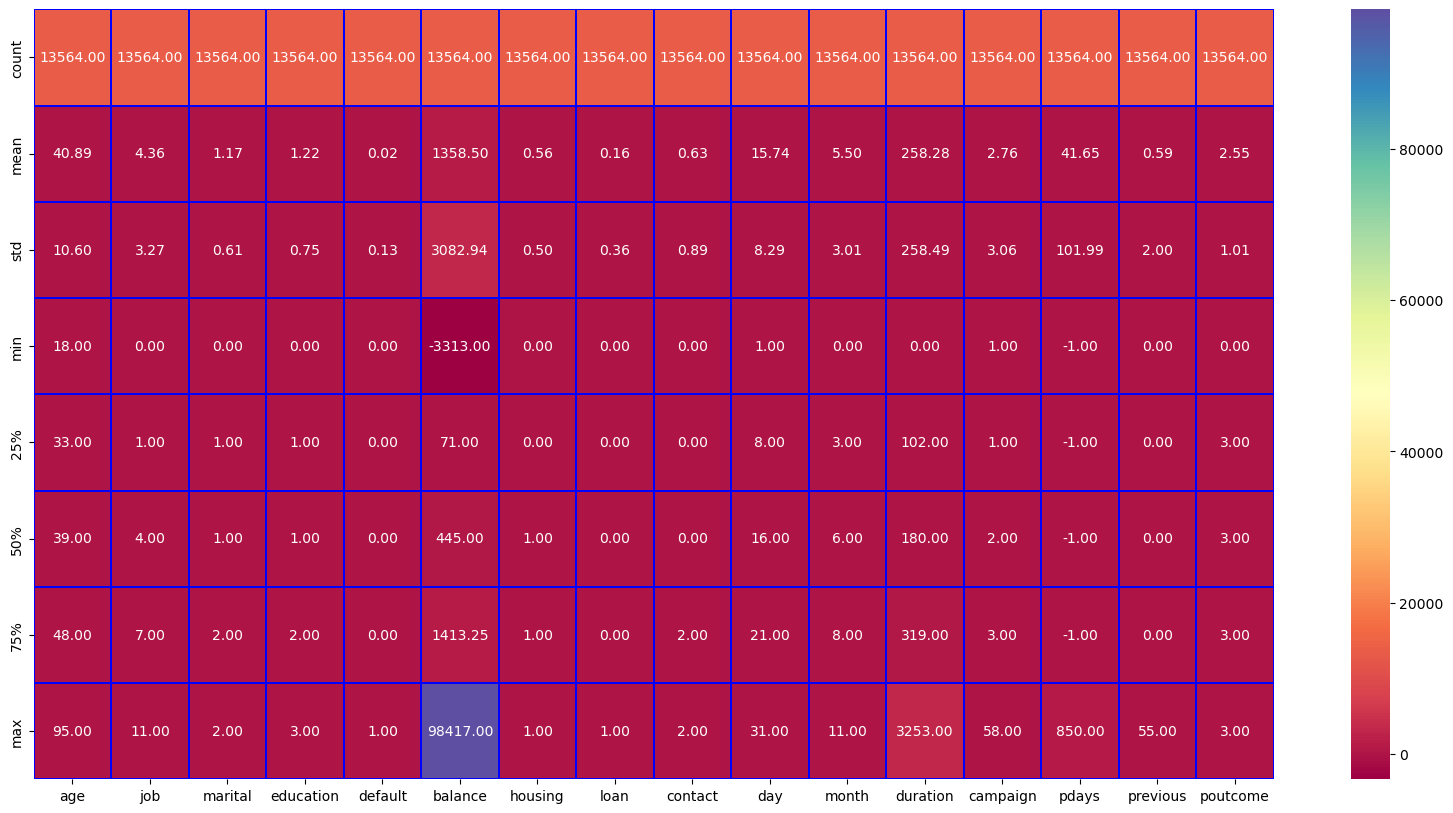

In [95]:
plt.figure(figsize=(20,10))
sns.heatmap(test.describe(),linewidth=0.3,annot=True,linecolor='blue',cmap='Spectral',fmt="0.2f")

1    8119
2    3868
0    1577
Name: marital, dtype: int64


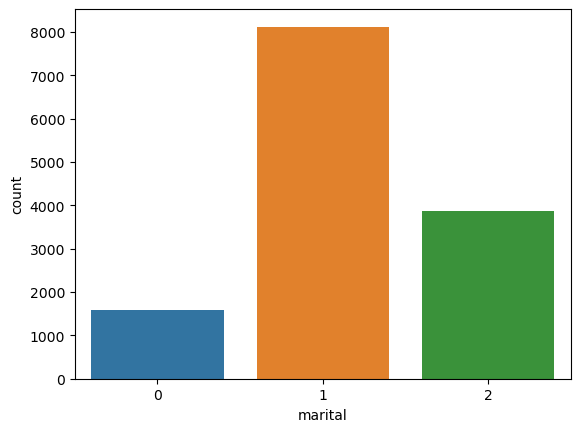

In [96]:
print(test['marital'].value_counts())
ax=sns.countplot(x='marital',data=test)

0    11451
1     2113
Name: loan, dtype: int64


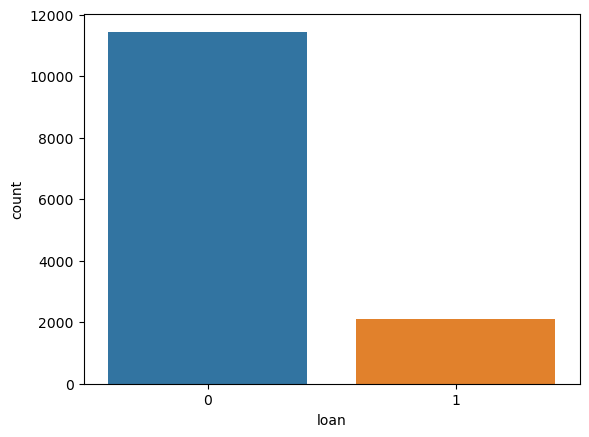

In [97]:
print(test['loan'].value_counts())
ax=sns.countplot(x='loan',data=test)

1     2890
4     2819
9     2290
0     1540
7     1251
5      690
2      479
6      456
10     398
3      366
8      303
11      82
Name: job, dtype: int64


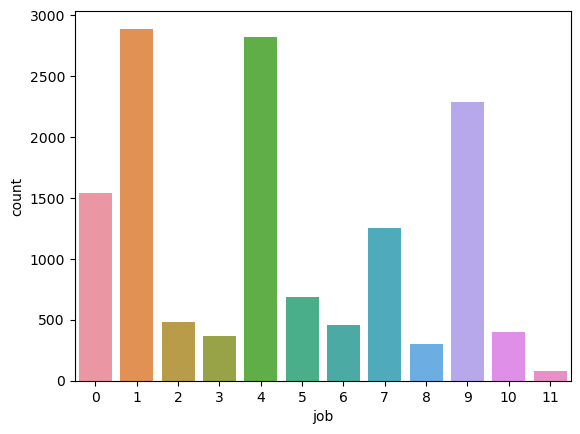

In [98]:
print(test['job'].value_counts())
ax=sns.countplot(x='job',data=test)

1    6978
2    4000
0    2043
3     543
Name: education, dtype: int64


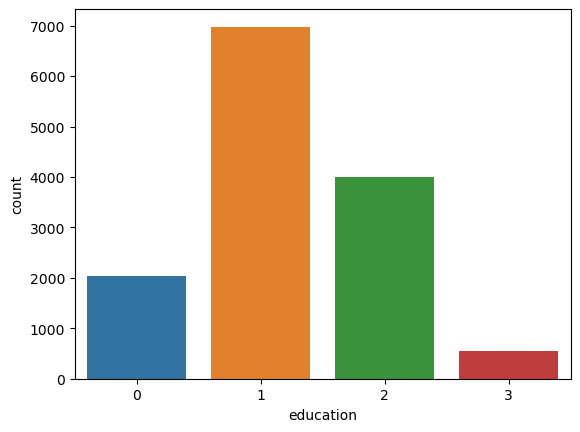

In [99]:
print(test['education'].value_counts())
ax=sns.countplot(x='education',data=test)

0    8862
2    3843
1     859
Name: contact, dtype: int64


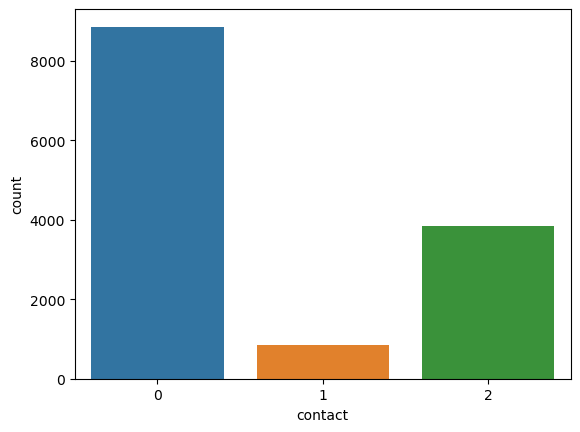

In [100]:
print(test['contact'].value_counts())
ax=sns.countplot(x='contact',data=test)

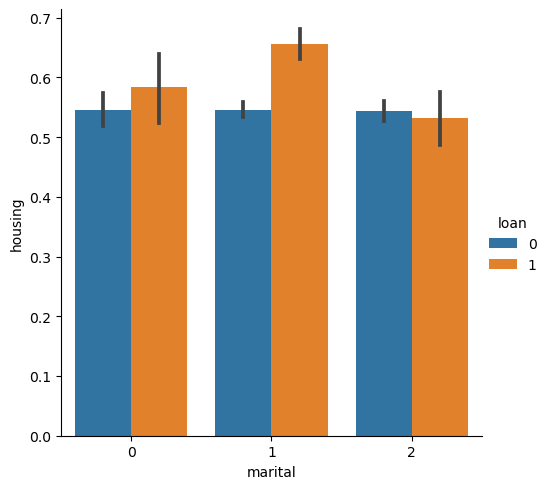

In [101]:
sns.catplot(x="marital",y="housing",hue="loan",data=test,kind="bar")
plt.show()

In [102]:
test.skew()

age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      9.165015
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     3.017221
campaign     4.958236
pdays        2.555601
previous     8.704583
poutcome    -1.921847
dtype: float64

In [103]:
test[['previous','balance','default','campaign','duration','pdays','loan']]=np.cbrt(test[['previous','balance','default','campaign','duration','pdays','loan']])  

In [104]:
test.skew()

age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance     -0.059591
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     0.624285
campaign     1.618080
pdays        1.722786
previous     2.005334
poutcome    -1.921847
dtype: float64

In [105]:
test_scaled = scaler.transform(test)
test_predictions = Final_Model.predict(test_scaled)


In [106]:
conculusion=pd.DataFrame([Final_Model.predict(X_test)[:],Y_test[:]],index=["Predicted","Original"])
conculusion

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  ...   
Original    0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  ...   

           9485  9486  9487  9488  9489  9490  9491  9492  9493  9494  
Predicted   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  
Original    0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  

[2 rows x 9495 columns]